In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "C:\\Users\\aswin\\OneDrive\\Desktop\\Imarticus\\00_Capstone Projects_Imarticus\\Capstone_2_Facial_Recognition\\Images\\train"

In [3]:
validation_path= "C:\\Users\\aswin\\OneDrive\\Desktop\\Imarticus\\00_Capstone Projects_Imarticus\\Capstone_2_Facial_Recognition\\Images\\test"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data_gen = ImageDataGenerator(rescale = 1./225)
validation_data_gen = ImageDataGenerator(rescale = 1./225)

# Train Set

In [6]:
train_set = train_data_gen.flow_from_directory(train_path,
                                               target_size = (64,64),
                                               batch_size = 20,
                                               class_mode = 'categorical')

Found 320 images belonging to 40 classes.


# Validation Set

In [7]:
validation_set = validation_data_gen.flow_from_directory(validation_path,
                                                         target_size = (64,64),
                                                         batch_size = 20,
                                                         class_mode = 'categorical')

Found 80 images belonging to 40 classes.


# BASE MODEL

In [8]:
classifier = Sequential()
classifier.add(Convolution2D(32, kernel_size=(3,3),input_shape=(64,64,3), activation ='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(40, activation='softmax'))

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

# Compiler

In [10]:
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])

# Execution of model

In [11]:
model = classifier.fit_generator(train_set, epochs =20, validation_data = validation_set)

Epoch 1/20
16/16 [==============================] - 14s 829ms/step - loss: 3.7081 - accuracy: 0.0250 - val_loss: 3.6844 - val_accuracy: 0.0250
Epoch 2/20
16/16 [==============================] - 9s 545ms/step - loss: 3.6694 - accuracy: 0.0500 - val_loss: 3.6141 - val_accuracy: 0.0500
Epoch 3/20
16/16 [==============================] - 9s 559ms/step - loss: 3.5173 - accuracy: 0.0938 - val_loss: 3.3385 - val_accuracy: 0.1250
Epoch 4/20
16/16 [==============================] - 9s 542ms/step - loss: 3.0704 - accuracy: 0.1906 - val_loss: 2.7549 - val_accuracy: 0.2750
Epoch 5/20
16/16 [==============================] - 8s 533ms/step - loss: 2.4080 - accuracy: 0.4219 - val_loss: 2.2888 - val_accuracy: 0.4250
Epoch 6/20
16/16 [==============================] - 9s 539ms/step - loss: 1.9825 - accuracy: 0.5437 - val_loss: 2.1775 - val_accuracy: 0.4875
Epoch 7/20
16/16 [==============================] - 9s 536ms/step - loss: 1.4466 - accuracy: 0.6375 - val_loss: 1.7911 - val_accuracy: 0.5375
Epoch

# Accuracy 

In [12]:
import matplotlib.pyplot as plt

In [13]:
acc = model.history['accuracy']

In [14]:
val_acc = model.history['val_accuracy']

In [15]:
loss = model.history['loss']

In [16]:
val_loss = model.history['val_loss']

In [17]:
epochs = range(1, len(acc) + 1)

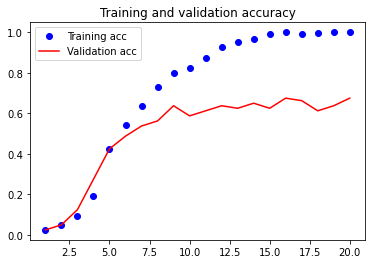

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc');
plt.plot(epochs, val_acc, 'r', label='Validation acc');
plt.title('Training and validation accuracy');
plt.legend();
plt.figure();

# Loss

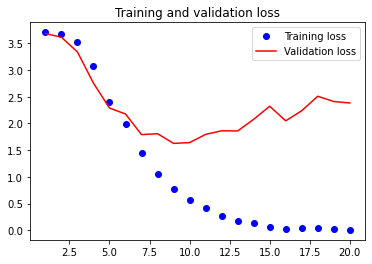

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, loss, 'bo', label='Training loss');
plt.plot(epochs, val_loss, 'r', label='Validation loss');
plt.title('Training and validation loss');
plt.legend();
plt.figure();

--------------------------------------------------------------------------------------------------------------------------------

# MODEL 2

In [20]:
train_data_gen = ImageDataGenerator(rescale=1./225,
                                    shear_range=0.5,
                                    zoom_range=0.5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2)

In [21]:
validation_data_gen = ImageDataGenerator(rescale=1./225)

# Training Set

In [22]:
train_set = train_data_gen.flow_from_directory(train_path,
                                               target_size=(64,64),
                                               batch_size=20,
                                               class_mode='categorical')

Found 320 images belonging to 40 classes.


# Validation Set 

In [23]:
validation_set = validation_data_gen.flow_from_directory(validation_path,
                                                         target_size=(64,64),
                                                         batch_size=20,
                                                         class_mode='categorical')

Found 80 images belonging to 40 classes.


# MODEL

In [24]:
classifier = Sequential()
classifier.add(Convolution2D(32, kernel_size=(3,3),input_shape=(64,64,3), activation ='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64, activation='relu'))
classifier.add(Dense(40, activation='softmax'))

In [25]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)        

# Compiler

In [26]:
classifier.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# Execution of model

In [27]:
model2 = classifier.fit_generator(train_set, epochs = 150,validation_data=validation_set)

Epoch 1/150
16/16 [==============================] - 10s 575ms/step - loss: 3.6985 - accuracy: 0.0188 - val_loss: 3.6902 - val_accuracy: 0.0250
Epoch 2/150
16/16 [==============================] - 9s 541ms/step - loss: 3.6913 - accuracy: 0.0250 - val_loss: 3.6870 - val_accuracy: 0.0125
Epoch 3/150
16/16 [==============================] - 10s 606ms/step - loss: 3.6884 - accuracy: 0.0188 - val_loss: 3.6837 - val_accuracy: 0.0625
Epoch 4/150
16/16 [==============================] - 9s 549ms/step - loss: 3.6850 - accuracy: 0.0375 - val_loss: 3.6693 - val_accuracy: 0.0500
Epoch 5/150
16/16 [==============================] - 9s 580ms/step - loss: 3.6588 - accuracy: 0.0500 - val_loss: 3.5845 - val_accuracy: 0.0750
Epoch 6/150
16/16 [==============================] - 9s 571ms/step - loss: 3.5852 - accuracy: 0.0500 - val_loss: 3.4374 - val_accuracy: 0.1000
Epoch 7/150
16/16 [==============================] - 11s 685ms/step - loss: 3.4652 - accuracy: 0.0750 - val_loss: 3.2110 - val_accuracy: 0.1

# Accuracy 

In [28]:
import matplotlib.pyplot as plt

In [29]:
acc = model2.history['accuracy']

In [30]:
val_acc = model2.history['val_accuracy']

In [31]:
loss = model2.history['loss']

In [32]:
val_loss = model2.history['val_loss']

In [33]:
epochs = range(1, len(acc) + 1)

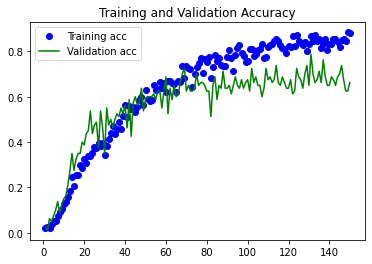

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(epochs, acc, 'bo', label='Training acc');
plt.plot(epochs, val_acc, 'g', label='Validation acc');
plt.title('Training and Validation Accuracy');
plt.legend();
plt.figure();

# Loss

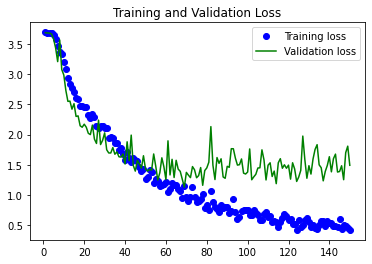

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(epochs, loss, 'bo', label='Training loss');
plt.plot(epochs, val_loss, 'g', label='Validation loss');
plt.title('Training and Validation Loss');
plt.legend();
plt.figure();

----------------------------------------------------------------------------------------------------------------------------------